Perform EDA to obtain the total number of orders, customers, items, revenue, and freight cost per customer state and city.


In [ ]:
#pip install sqlalchemy google-cloud-bigquery sqlalchemy-bigquery

In [ ]:
#pip install google-cloud-bigquery-storage

In [50]:
import pandas as pd
import numpy as np

Connect to BigQuery using SQLAlchemy:

In [51]:
from sqlalchemy import create_engine

project_id = "dsai-g3-m2-project"

# Create an SQLAlchemy engine for BigQuery
engine = create_engine(f"bigquery://dsai-g3-m2-project")


In [52]:
from sqlalchemy import text

Fetch data from orders group by customer state:

In [54]:
# Query to fetch data from orders grouped by customer state
query = """
select
    c.customer_state,
    count(distinct o.order_id) as num_orders,
    count(distinct o.customer_id) as num_customers,
    sum(num_items) as total_items,
    sum(total_order_revenue) as total_revenue,
    sum(total_freight_cost) as total_freight_cost
FROM `dsai-g3-m2-project.brazilian_ecommerce_sales.fact_orders` as o
join `dsai-g3-m2-project.brazilian_ecommerce_sales.dim_customers` as c
    on o.customer_id = c.customer_id
group by c.customer_state;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    # Fetch all rows and column names
    rows = result.fetchall()
    columns = result.keys()
    # Create a Pandas DataFrame
    df1 = pd.DataFrame(rows, columns=columns)

df1_sort_by_revenue = df1.sort_values(by='total_revenue', ascending=False)



In [55]:
df1_sort_by_revenue.head()

,customer_state,num_orders,num_customers,total_items,total_revenue,total_freight_cost
1,SP,41375,41375,47449,5202955.05,718723.07
0,RJ,12762,12762,14579,1824092.67,305589.31
3,MG,11544,11544,13129,1585308.03,270853.46
8,RS,5432,5432,6235,750304.02,135522.74
2,PR,4998,4998,5740,683083.76,117851.68


In [ ]:
df1_sort_by_revenue.to_csv('orders_by_customer_state.csv', index=False)

Fetch data from orders group by customer city:

In [56]:
# Query to fetch data from orders grouped by customer city
query = """
select
    c.customer_city,
    count(distinct o.order_id) as num_orders,
    count(distinct o.customer_id) as num_customers,
    sum(num_items) as total_items,
    sum(total_order_revenue) as total_revenue,
    sum(total_freight_cost) as total_freight_cost
FROM `dsai-g3-m2-project.brazilian_ecommerce_sales.fact_orders` as o
join `dsai-g3-m2-project.brazilian_ecommerce_sales.dim_customers` as c
    on o.customer_id = c.customer_id
group by c.customer_city;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    # Fetch all rows and column names
    rows = result.fetchall()
    columns = result.keys()
    # Create a Pandas DataFrame
    df2 = pd.DataFrame(rows, columns=columns)

df2_sort_by_revenue = df2.sort_values(by='total_revenue', ascending=False).head(30)


In [57]:
df2_sort_by_revenue.head()

,customer_city,num_orders,num_customers,total_items,total_revenue,total_freight_cost
3,sao paulo,15402,15402,17808,1914924.54,255302.58
6,rio de janeiro,6834,6834,7837,992538.86,161695.16
27,belo horizonte,2750,2750,3144,355611.13,61122.26
19,brasilia,2116,2116,2392,301920.25,50384.89
4,curitiba,1510,1510,1751,211738.06,33001.81


In [ ]:
df2_sort_by_revenue.to_csv('orders_by_customer_city.csv', index=False)

In [ ]:
num_customer_states = df1['customer_state'].nunique()
print(f"Number of unique customer states: {num_customer_states}")

In [ ]:
num_customer_city = df2['customer_city'].nunique()
print(f"Number of unique customer city: {num_customer_city}")

Create a bar plot of number of orders by customer state:

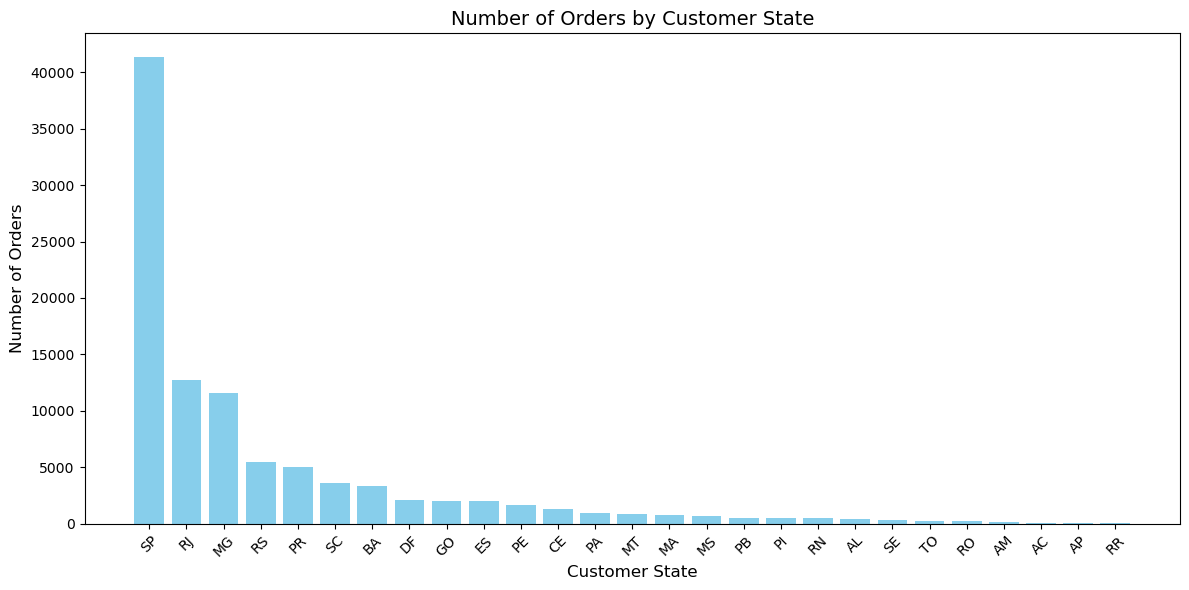

In [ ]:
import matplotlib.pyplot as plt
# Create a bar plot of number of orders by customer state

plt.figure(figsize=(12, 6))
plt.bar(df1_sort_by_revenue['customer_state'], df1_sort_by_revenue['num_orders'], color='skyblue')

# Add labels and title
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Number of Orders by Customer State', fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

Create a bar plot of total revenue by customer state:

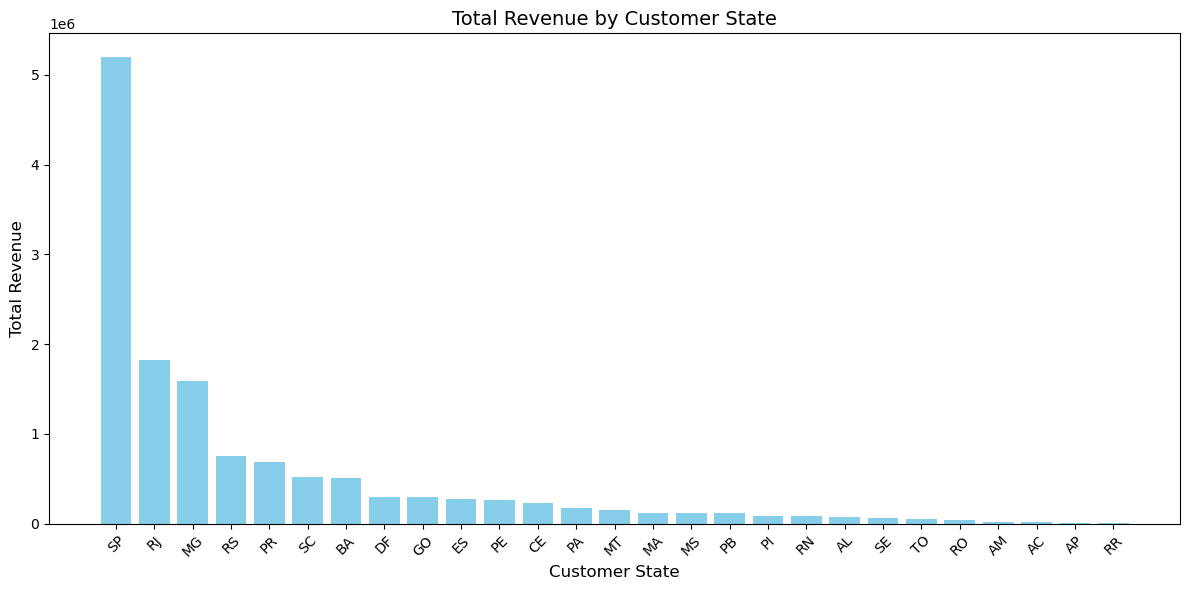

In [60]:
# Create a bar plot of total revenue by customer state
plt.figure(figsize=(12, 6))
plt.bar(df1_sort_by_revenue['customer_state'], df1_sort_by_revenue['total_revenue'], color='skyblue')

# Add labels and title
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.title('Total Revenue by Customer State', fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

Create a bar plot of total revenue by customer city:

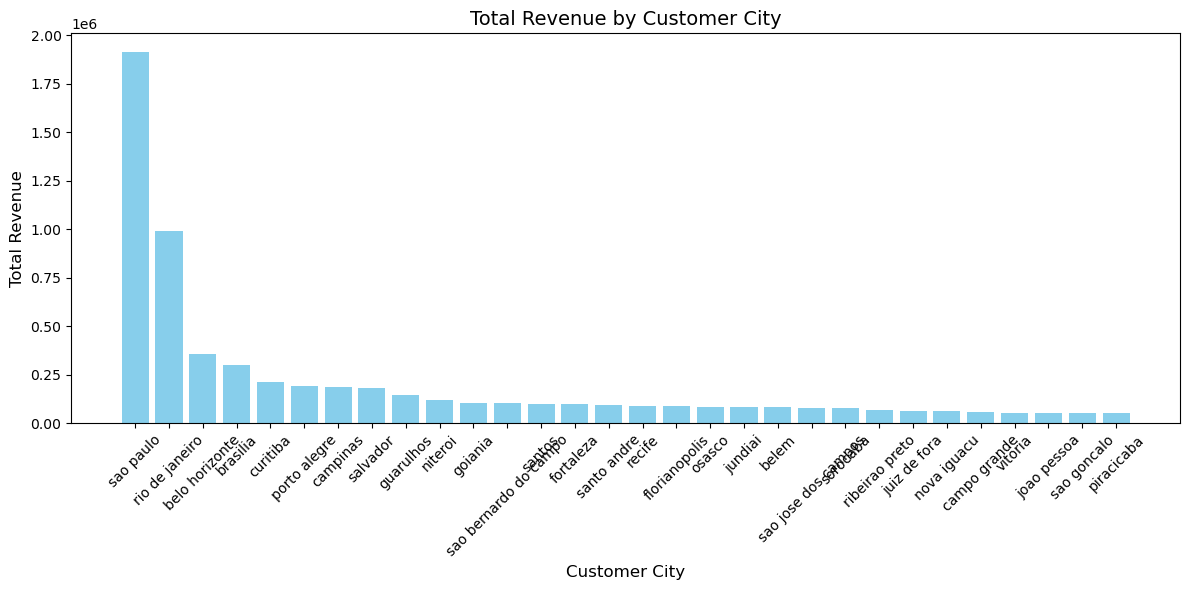

In [61]:
# Create a bar plot of total revenue by customer city
plt.figure(figsize=(12, 6))
plt.bar(df2_sort_by_revenue['customer_city'], df2_sort_by_revenue['total_revenue'], color='skyblue')

# Add labels and title
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.title('Total Revenue by Customer City', fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()